# Module 3 Unit 3
## Manage complexity using pruning
### Classification problem

Insert your code after `### YOUR CODE HERE`, and then remove `raise NotImplementedError()` to indicate that you have added code.  
**NOTE:** This notebook will not be graded, but you should submit it when you submit your assignment, so that the tutor team can see how you arrived at your answers.

In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
# Import data
df = pd.read_csv('HRDataset_v13.csv', delimiter = ",")

The HR data set is licensed under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) licence.

In [ ]:
# Explore the size of the data set
df.shape

(310, 35)

In [ ]:
# Explore types of data and feature names
df.sample()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
227,"Mancuso, Karen",1304055986,1,1,0,5,5,3,0,23.0,...,Production,Amy Dunn,11.0,Newspager/Magazine,Fully Meets,5.0,4,0,NaN,NaN


In [ ]:
# Identify the type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 35 columns):
Employee_Name                 310 non-null object
EmpID                         310 non-null int64
MarriedID                     310 non-null int64
MaritalStatusID               310 non-null int64
GenderID                      310 non-null int64
EmpStatusID                   310 non-null int64
DeptID                        310 non-null int64
PerfScoreID                   310 non-null int64
FromDiversityJobFairID        310 non-null int64
PayRate                       310 non-null float64
Termd                         310 non-null int64
PositionID                    310 non-null int64
Position                      310 non-null object
State                         310 non-null object
Zip                           310 non-null int64
DOB                           310 non-null object
Sex                           310 non-null object
MaritalDesc                   310 non-null object
Citiz

In [ ]:
# Explore reasons for termination
df['EmploymentStatus'].unique()

array(['Active', 'Terminated for Cause', 'Voluntarily Terminated',
       'Future Start', 'Leave of Absence'], dtype=object)

In [ ]:
# Explore the departments
df['Department'].unique()

array(['Admin Offices', 'Sales', 'IT/IS', 'Production       ',
       'Executive Office', 'Software Engineering'], dtype=object)

Complete the following:
* Put the following variables in a Python list and assign it the variable name `all_vars`.  
    * `MarriedID, PerfScoreID, FromDiversityJobFairID, PayRate, EmpSatisfaction, SpecialProjectsCount, Termd`

In [ ]:
# Make the list all_vars
# Hint: Column names need to have quotation marks
# YOUR CODE HERE
all_vars = ["MarriedID", "PerfScoreID", "FromDiversityJobFairID","PayRate","EmpSatisfaction","SpecialProjectsCount","Termd"]


# Check that there are no missing values
df_to_use1 = df.loc[:, all_vars]
print(df_to_use1.isnull().sum()) 

MarriedID                 0
PerfScoreID               0
FromDiversityJobFairID    0
PayRate                   0
EmpSatisfaction           0
SpecialProjectsCount      0
Termd                     0
dtype: int64


Recall the process of one hot encoding. Here, it will be applied to the `DeptID` input variable before adding it to the features to be used.

In [ ]:
# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(df.DeptID.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ["DeptID_"+str(int(i)) for i in range(Xd.shape[1])])

# Add encoded feature to the dataframe
df_to_use2 = pd.concat([df_to_use1, df_ohe], axis=1)
df_to_use2.head(10)

,MarriedID,PerfScoreID,FromDiversityJobFairID,PayRate,EmpSatisfaction,SpecialProjectsCount,Termd,DeptID_0,DeptID_1,DeptID_2,DeptID_3,DeptID_4,DeptID_5
0,1,3,1,28.50,2,6,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,3,0,23.00,4,4,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,3,0,29.00,5,5,0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,3,0,21.50,3,4,1,1.0,0.0,0.0,0.0,0.0,0.0
4,0,3,0,16.56,3,5,0,1.0,0.0,0.0,0.0,0.0,0.0
5,1,3,1,20.50,4,4,1,1.0,0.0,0.0,0.0,0.0,0.0
6,1,3,0,55.00,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0
7,0,3,0,55.00,5,0,0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,1,0,55.00,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,3,0,56.00,5,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Split data into features (X) and response (y)
X = df_to_use2.iloc[:, np.r_[0:6, 7:13]]
y = df_to_use2.loc[:, ["Termd"]]

In [ ]:
# Ensure that you have the following features: 
'''MarriedID,  PerfScoreID, FromDiversityJobFairID, 
   PayRate, EmpSatisfaction, SpecialProjectsCount, DeptID (0 to 5),'''

X.head()

,MarriedID,PerfScoreID,FromDiversityJobFairID,PayRate,EmpSatisfaction,SpecialProjectsCount,DeptID_0,DeptID_1,DeptID_2,DeptID_3,DeptID_4,DeptID_5
0,1,3,1,28.50,2,6,1.0,0.0,0.0,0.0,0.0,0.0
1,0,3,0,23.00,4,4,1.0,0.0,0.0,0.0,0.0,0.0
2,0,3,0,29.00,5,5,1.0,0.0,0.0,0.0,0.0,0.0
3,1,3,0,21.50,3,4,1.0,0.0,0.0,0.0,0.0,0.0
4,0,3,0,16.56,3,5,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check that your response is Termd
y.head(10)

,Termd
0,0
1,0
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [ ]:
# Split the data into the train set and test set
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =0)
print(X_train.shape,X_test.shape)

# Fit data to a tree-based classification model
# Hint: Use the training set from above
classifier = DecisionTreeClassifier(random_state=0)
# YOUR CODE HERE
classifier.fit(X_train,y_train)

# What is the accuracy before pruning?
# Assign the accuracy score to the variable name test_score.
# YOUR CODE HERE
y_pred = classifier.predict(X_test)
test_score = accuracy_score(y_test, y_pred)

# Print the test score.
print("Accuracy score of the tree = {:2.2%}".format(test_score)) 

(232, 12) (78, 12)
Accuracy score of the tree = 58.97%


Did you get a test score of 58.97%? This is quite a good score for an unpruned tree.



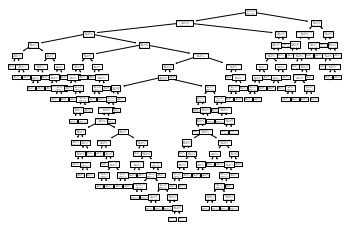

In [ ]:
# Plot the full tree
plt.figure()
plot_tree(classifier,feature_names=X.columns)
plt.show()

In [ ]:
print("Tree depth =",classifier.get_depth(),'\n'
      "Number of leaves =",classifier.get_n_leaves())

Tree depth = 19 
Number of leaves = 95


In [ ]:
# Finding the optimal number of samples per leaf
samples = [sample for sample in range(1,30)]     

# Reflect on why the range 1–30 was used

classifiers = []
for sample in samples:
    classifier2 = DecisionTreeClassifier(random_state=0, 
                                         min_samples_leaf=sample)
    classifier2.fit(X_train, y_train)
    classifiers.append(classifier2)

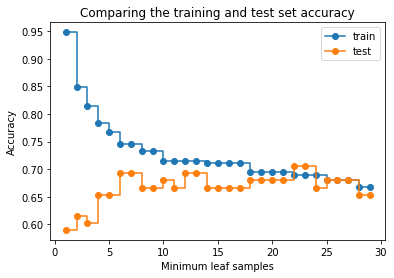

In [ ]:
# Visualise the performance of each subtree on the training and test sets
train_scores = [clf.score(X_train, y_train) for clf in classifiers]
test_scores = [clf.score(X_test, y_test) for clf in classifiers]

fig, ax = plt.subplots()
ax.set_xlabel("Minimum leaf samples")
ax.set_ylabel("Accuracy")
ax.set_title("Comparing the training and test set accuracy")
ax.plot(samples, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(samples, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# In order to find the optimal minimum leaf samples, cross validation is applied
validation_scores = []
for sample in samples:
    classifier3 = DecisionTreeClassifier(random_state=1, min_samples_leaf=sample)
    score = cross_val_score(estimator=classifier3, X=X_train, y=y_train, cv=5)   
    validation_scores.append(score.mean())

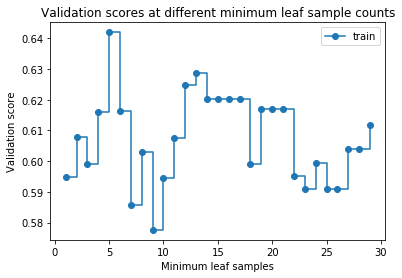

In [ ]:
# Visualise the validation score in relation to minimum leaf samples
plt.figure()
plt.xlabel("Minimum leaf samples")
plt.ylabel("Validation score")
plt.title("Validation scores at different minimum leaf sample counts")
plt.plot(samples, validation_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.legend()
plt.show()

In [ ]:
# Obtain the minimum leaf samples with the highest validation score
samples_optimum = samples[validation_scores.index(max(validation_scores))]
print(samples_optimum)

5


In [ ]:
# Use the optimum  minimun leaf samples to fit a parsimonious tree
# Hint: The first line of code should look like this:
# classifier4 = DecisionTreeClassifier(random_state=0, min_samples_leaf=???)

# YOUR CODE HERE
classifier4 = DecisionTreeClassifier(random_state=0, min_samples_leaf=5)
classifier4.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

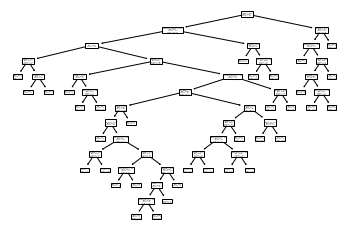

In [ ]:
# Visualise the smaller pruned tree
plt.figure()
plot_tree(classifier4, feature_names=X_train.columns)
plt.show()

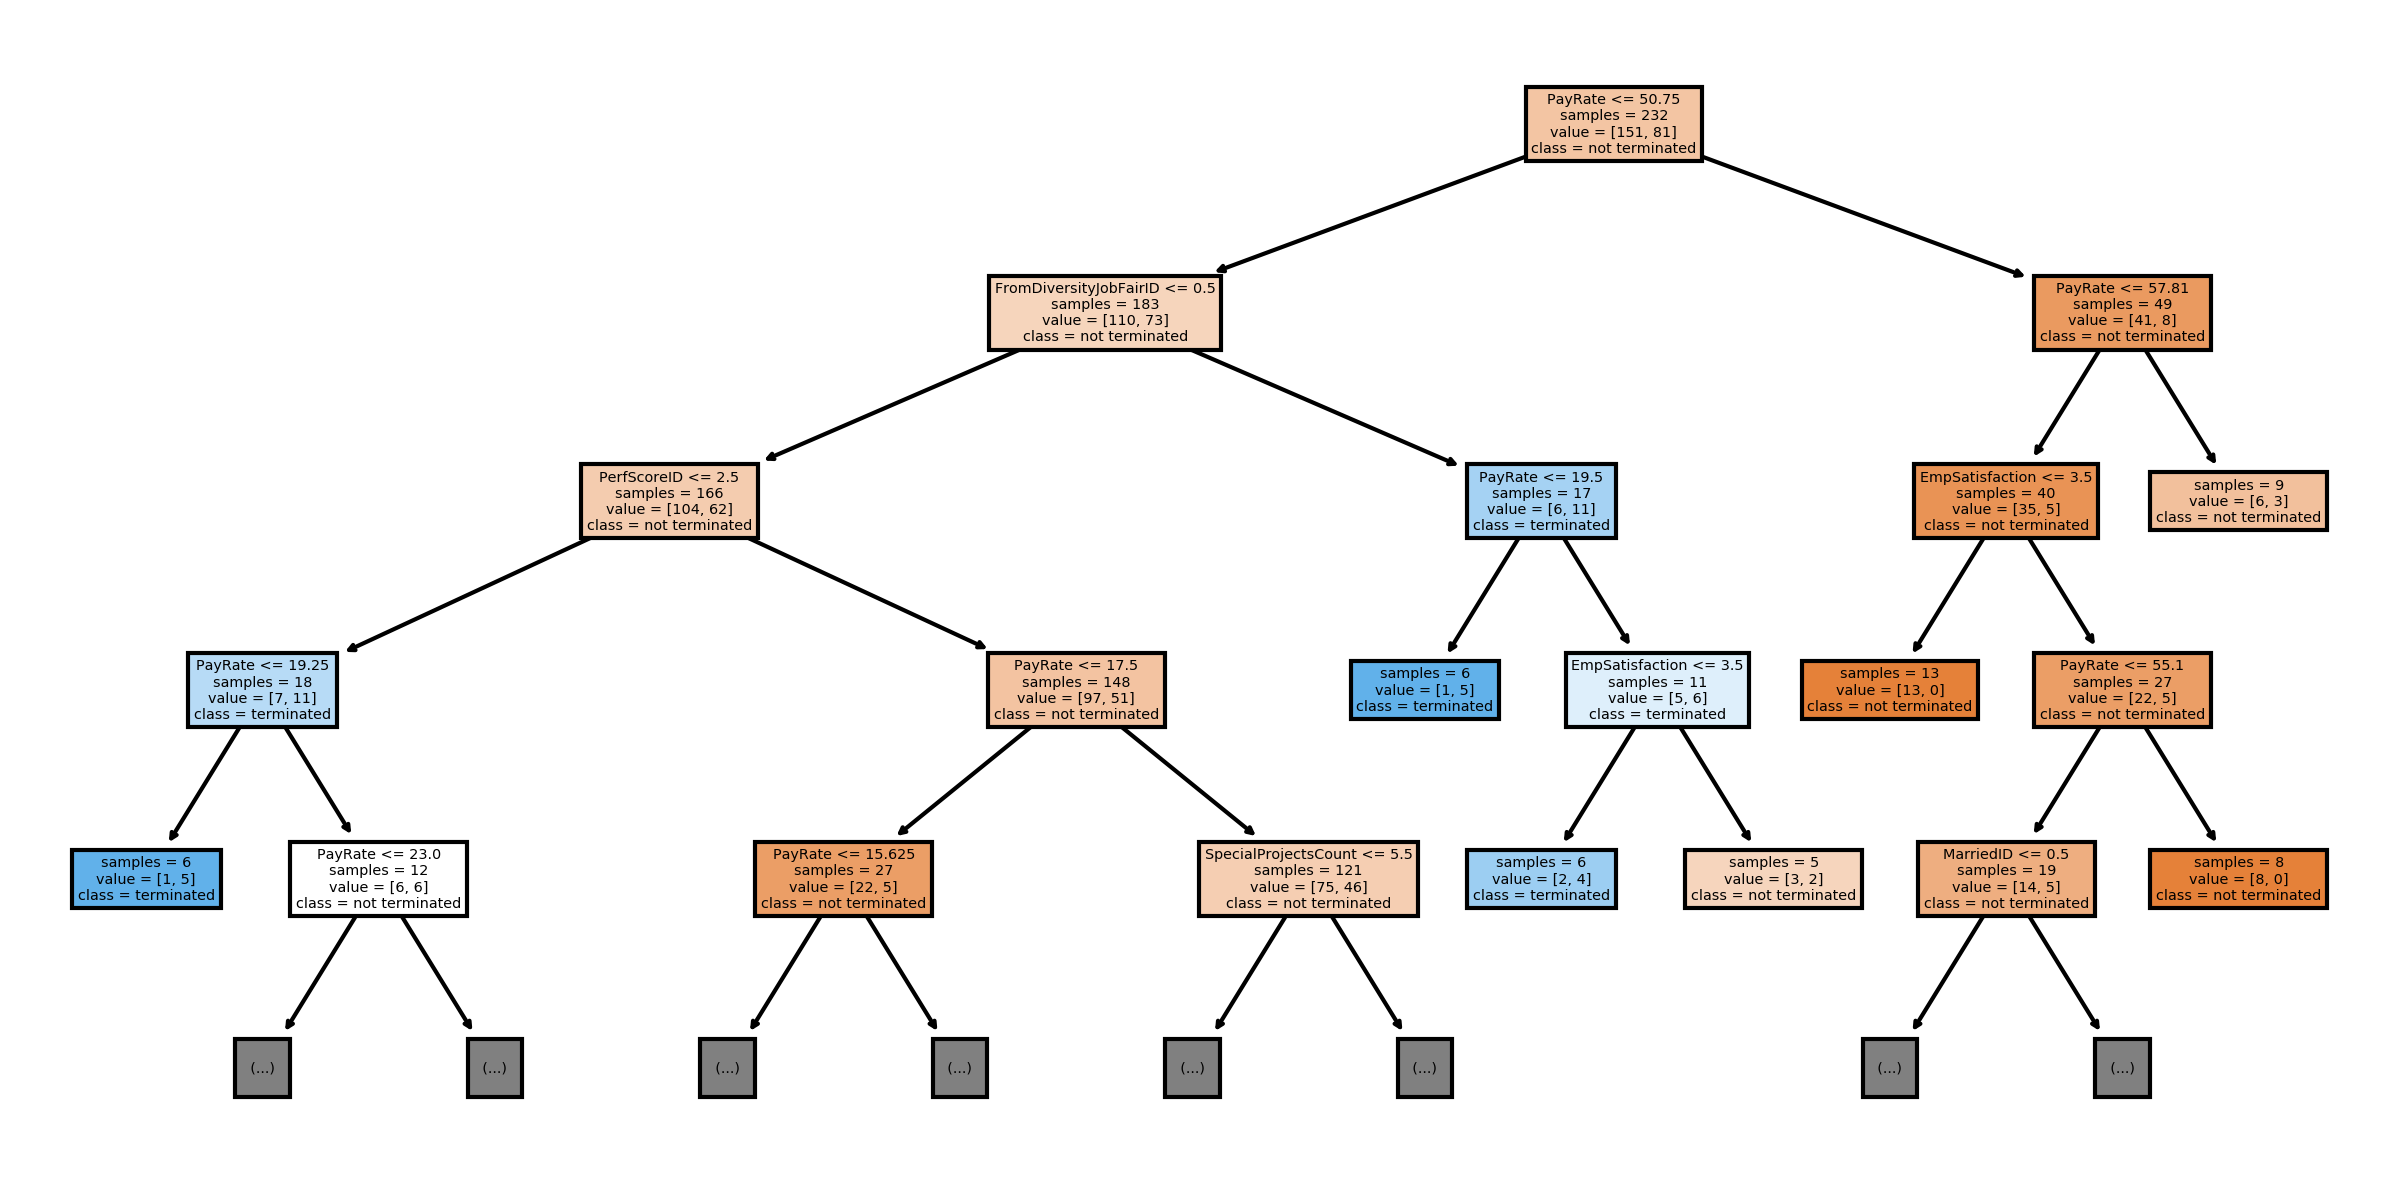

In [ ]:
# Show the first few levels of the tree
plt.figure(figsize=[10,5], dpi=300)
plot_tree(classifier4, max_depth=4, 
          feature_names=X_train.columns, 
          class_names=['not terminated', 'terminated'],
          impurity=False,
          filled=True)
plt.show()

In [ ]:
# Save the plot as an image
plt.savefig('HRDataset_tree.png')

<Figure size 432x288 with 0 Axes>

Right-click on "HRDataset_tree.png" in the 3.6 IDE activity folder to download the image so you can zoom in to read the contents of the nodes.

In [ ]:
# Final test to see how the model performs:
y_pred = classifier4.predict(X_test)
test_score2 = accuracy_score(y_test, y_pred)
print("Accuracy score of the optimal tree = {:2.2%}".format(test_score2))
print("Tree depth =",classifier4.get_depth(),'\n'
      "Number of leaves =",classifier4.get_n_leaves()) 

Accuracy score of the optimal tree = 65.38%
Tree depth = 13 
Number of leaves = 34


Did the accuracy improve compared to the original?



Now, fit the final model to be used for predictions in the future.

In [ ]:
# Fit the final model
# YOUR CODE HERE
best_model = DecisionTreeClassifier(random_state=0, min_samples_leaf=34)
best_model.fit(X, y)
print("Tree depth =",best_model.get_depth(),'\n'
      "Number of leaves =",best_model.get_n_leaves())

Tree depth = 5 
Number of leaves = 6


Continue to the activity to answer the questions related to this exercise.